  # Problem Statement: Unlocking Societal Trends in Aadhaar Enrolment and Updates

Identify meaningful patterns, trends, anomalies, or predictive indicators and translate them into clear insights or solution frameworks that can support informed decision-making and system improvements.


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ===============================
# STEP 1: Set dataset directory
# ===============================
# 👉 CHANGE THIS PATH to where your CSV files are stored
DATA_DIR = r"C:\Users\hp\Desktop\UIDAI\api_data_aadhar_enrolment"

# Change working directory
try:
    os.chdir(DATA_DIR)
except FileNotFoundError:
    print(f"Warning: Directory {DATA_DIR} not found. Using current directory.")

# ===============================
# STEP 3: Load UIDAI CSV files
# ===============================
files = [f for f in os.listdir() if f.endswith('.csv') and 'aadhar_enrolment' in f]
print(f"Loading {len(files)} files: {files}")

dfs = []
for f in files:
    dfs.append(pd.read_csv(f))

if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    print("\nDataset Shape:", combined_df.shape)
else:
    # Fallback if no files found (for template purposes)
    print("No data files found. Please check DATA_DIR.")
    combined_df = pd.DataFrame(columns=['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater'])

# Calculate Total Enrollments column immediately
combined_df['total_enrollments'] = (
    combined_df['age_0_5'] +
    combined_df['age_5_17'] +
    combined_df['age_18_greater']
)

combined_df.head()


Loading 3 files: ['api_data_aadhar_enrolment_1000000_1006029.csv', 'api_data_aadhar_enrolment_0_500000.csv', 'api_data_aadhar_enrolment_500000_1000000.csv']

Dataset Shape: (1006029, 7)


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrollments
0,31-12-2025,Karnataka,Bidar,585330,2,3,0,5
1,31-12-2025,Karnataka,Bidar,585402,6,0,0,6
2,31-12-2025,Karnataka,Bidar,585413,1,0,0,1
3,31-12-2025,Karnataka,Bidar,585418,1,2,0,3
4,31-12-2025,Karnataka,Bidar,585421,4,3,0,7


In [ ]:
# Explore data structure, columns, and data types
print("=" * 60)
print("DATA STRUCTURE ANALYSIS")
print("=" * 60)

print("\n📋 COLUMNS:")
print(combined_df.columns.tolist())

print("\n📊 DATA TYPES:")
print(combined_df.dtypes)

print("\n📈 COLUMN SUMMARY:")
for col in combined_df.columns:
    print(f"\n{col}:")
    print(f"  - Type: {combined_df[col].dtype}")
    print(f"  - Unique values: {combined_df[col].nunique():,}")
    print(f"  - Null count: {combined_df[col].isnull().sum():,} ({combined_df[col].isnull().sum()/len(combined_df)*100:.2f}%)")

DATA STRUCTURE ANALYSIS

📋 COLUMNS:
['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater', 'total_enrollments']

📊 DATA TYPES:
date                 object
state                object
district             object
pincode               int64
age_0_5               int64
age_5_17              int64
age_18_greater        int64
total_enrollments     int64
dtype: object

📈 COLUMN SUMMARY:

date:
  - Type: object
  - Unique values: 92
  - Null count: 0 (0.00%)

state:
  - Type: object
  - Unique values: 55
  - Null count: 0 (0.00%)

district:
  - Type: object
  - Unique values: 985
  - Null count: 0 (0.00%)

pincode:
  - Type: int64
  - Unique values: 19,463
  - Null count: 0 (0.00%)

age_0_5:
  - Type: int64
  - Unique values: 671
  - Null count: 0 (0.00%)

age_5_17:
  - Type: int64
  - Unique values: 624
  - Null count: 0 (0.00%)

age_18_greater:
  - Type: int64
  - Unique values: 199
  - Null count: 0 (0.00%)

total_enrollments:
  - Type: int64
  - Unique values: 1

In [ ]:
# Data profiling with summary statistics
print("=" * 60)
print("DATA PROFILING & QUALITY METRICS")
print("=" * 60)

print("\n📊 SUMMARY STATISTICS:")
print(combined_df.describe(include='all'))

# Data quality metrics
duplicate_count = combined_df.duplicated().sum()
print(f"\nDuplicate rows: {duplicate_count:,} ({duplicate_count/len(combined_df)*100:.2f}%)")

missing_by_col = combined_df.isnull().sum().sort_values(ascending=False)
if missing_by_col.max() == 0:
    print("  ✓ No missing data found!")
else:
    print(missing_by_col[missing_by_col > 0])

DATA PROFILING & QUALITY METRICS

📊 SUMMARY STATISTICS:
              date          state district       pincode       age_0_5  \
count      1006029        1006029  1006029  1.006029e+06  1.006029e+06   
unique          92             55      985           NaN           NaN   
top     15-12-2025  Uttar Pradesh     Pune           NaN           NaN   
freq         19426         110369     6663           NaN           NaN   
mean           NaN            NaN      NaN  5.186415e+05  3.525709e+00   
std            NaN            NaN      NaN  2.056360e+05  1.753851e+01   
min            NaN            NaN      NaN  1.000000e+05  0.000000e+00   
25%            NaN            NaN      NaN  3.636410e+05  1.000000e+00   
50%            NaN            NaN      NaN  5.174170e+05  2.000000e+00   
75%            NaN            NaN      NaN  7.001040e+05  3.000000e+00   
max            NaN            NaN      NaN  8.554560e+05  2.688000e+03   

            age_5_17  age_18_greater  total_enrollments

# Enrollment Trends Analysis

Analyzing enrollment volume over time to identify peaks and patterns.

Analysis Period: 2025-03-02 to 2025-12-31
Total Enrollments: 5,435,702
Daily Average: 59,084
Peak Day: 2025-07-01 with 616,868 enrollments


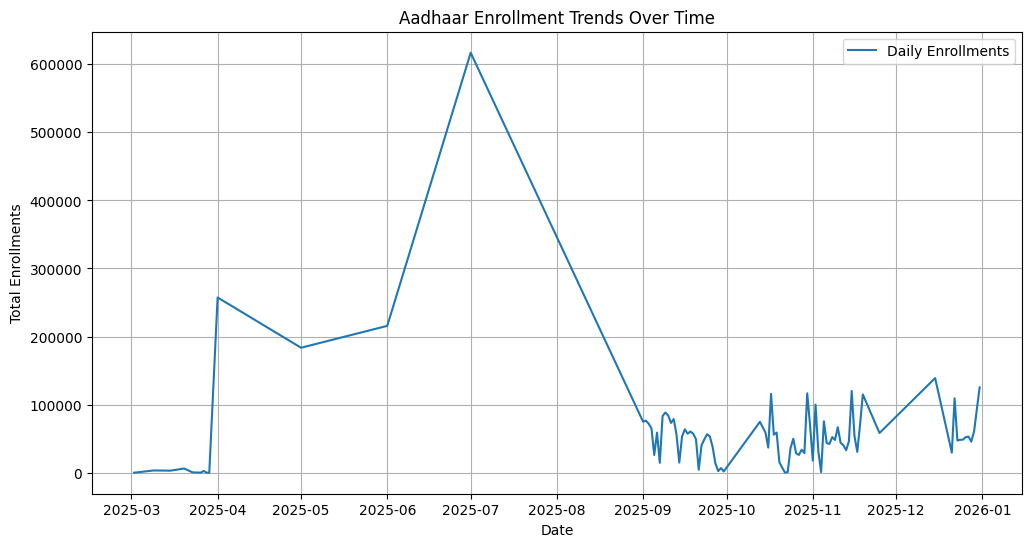

In [ ]:
# Convert date to datetime
try:
    # Attempt standard format first
    combined_df['date'] = pd.to_datetime(combined_df['date'], format='%d-%m-%Y', errors='coerce')
    # For any failures, try infer
    mask = combined_df['date'].isnull()
    if mask.any():
        combined_df.loc[mask, 'date'] = pd.to_datetime(combined_df.loc[mask, 'date'], errors='coerce')
    combined_df = combined_df.dropna(subset=['date'])  # Drop rows with invalid dates
except Exception as e:
    print(f"Date conversion error: {e}")

# Aggregate by date
daily_stats = combined_df.groupby('date')['total_enrollments'].sum().reset_index()
daily_stats = daily_stats.sort_values('date')

# Summary Metrics
total_enrollments = daily_stats['total_enrollments'].sum()
daily_average = daily_stats['total_enrollments'].mean()
if not daily_stats.empty:
    peak_day = daily_stats.loc[daily_stats['total_enrollments'].idxmax()]
    print(f"Analysis Period: {daily_stats['date'].min().date()} to {daily_stats['date'].max().date()}")
    print(f"Total Enrollments: {total_enrollments:,}")
    print(f"Daily Average: {daily_average:,.0f}")
    print(f"Peak Day: {peak_day['date'].date()} with {peak_day['total_enrollments']:,} enrollments")

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(daily_stats['date'], daily_stats['total_enrollments'], label='Daily Enrollments')
    plt.title('Aadhaar Enrollment Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Enrollments')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No valid daily stats available.")

# Anomaly Detection & Fraud Risk Assessment

We calculate statistical anomalies (Z-scores), demographic skew, and duplicate patterns to identify potential fraud.

In [ ]:
# 1. Demographics Deviation
# Census Estimate Norms: 0-5 (9%), 5-17 (19%), 18+ (72%)
combined_df['age_0_5_pct'] = (combined_df['age_0_5'] / combined_df['total_enrollments'] * 100).fillna(0)
combined_df['age_5_17_pct'] = (combined_df['age_5_17'] / combined_df['total_enrollments'] * 100).fillna(0)
combined_df['age_18_plus_pct'] = (combined_df['age_18_greater'] / combined_df['total_enrollments'] * 100).fillna(0)

combined_df['demographic_deviation'] = (
    abs(combined_df['age_0_5_pct'] - 9) +
    abs(combined_df['age_5_17_pct'] - 19) +
    abs(combined_df['age_18_plus_pct'] - 72)
)

# 2. Duplicate Detection (Specific subset)
duplicate_mask = combined_df.duplicated(subset=['date', 'state', 'district', 'pincode'], keep=False)
print(f"Duplicate Records: {duplicate_mask.sum():,} ({duplicate_mask.mean()*100:.2f}%)")

# 3. Temporal Z-Score
daily_stats = combined_df.groupby('date')['total_enrollments'].sum().reset_index().sort_values('date')
daily_stats['rolling_mean'] = daily_stats['total_enrollments'].rolling(window=7, min_periods=1).mean()
daily_stats['rolling_std'] = daily_stats['total_enrollments'].rolling(window=7, min_periods=1).std().fillna(1) # avoid div/0
daily_stats['z_score'] = (daily_stats['total_enrollments'] - daily_stats['rolling_mean']) / daily_stats['rolling_std']

# Map z-score back to main df
combined_df = combined_df.merge(daily_stats[['date', 'z_score']], on='date', how='left')
print("Anomaly Features Calculated.\n")

Duplicate Records: 45,914 (4.56%)
Anomaly Features Calculated.



# Fraud Risk Feature Engineering

Creating sophisticated features including demographic, geographic, temporal, and interaction risk indicators.

In [ ]:
feature_df = combined_df.copy()

# Demographic Risk
feature_df['demo_deviation_score'] = feature_df['demographic_deviation']
feature_df['demo_age_0_5_dominance'] = (feature_df['age_0_5_pct'] - 9) / 9
feature_df['demo_enrollment_log'] = np.log1p(feature_df['total_enrollments'])

# Geographic Risk (Concentration)
for level in ['state', 'district', 'pincode']:
    counts = feature_df.groupby(level)['total_enrollments'].transform('sum')
    feature_df[f'geo_{level}_concentration'] = counts / counts.max()

# Temporal Risk
feature_df['day_of_week'] = feature_df['date'].dt.day_name()
feature_df['temp_is_weekend'] = feature_df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
feature_df['temp_z_score'] = feature_df['z_score'].fillna(0)

# Interaction Features
feature_df['interact_geo_demo'] = feature_df['geo_district_concentration'] * feature_df['demo_deviation_score']

# Select Features
feature_columns = ['demo_deviation_score', 'demo_age_0_5_dominance', 'demo_enrollment_log',
                   'geo_state_concentration', 'geo_district_concentration', 'temp_z_score', 'interact_geo_demo']
X = feature_df[feature_columns].fillna(0)

# Normalize
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(f"Feature Matrix Created: {X_scaled.shape}")

Feature Matrix Created: (1006029, 7)


# Model Training & Evaluation

Since ground truth labels are not provided, we generate synthetic high-confidence fraud labels based on extreme anomalies (Deviation > 150 OR Spike > 3 sigma OR Duplicates) to train a supervised model that can generalize to other suspicious patterns.

In [ ]:
# Synthetic Label Generation (Semi-Supervised Approach)
# Rule: High Deviation (>150) OR High Z-Score (>3) OR Duplicate
combined_df['is_suspicious'] = (
    (combined_df['demographic_deviation'] > 150) |
    (combined_df['z_score'] > 3) |
    duplicate_mask
).astype(int)

y = combined_df['is_suspicious']
print(f"Suspicious Records (Target): {y.sum():,} ({y.mean()*100:.2f}%)")

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate
y_pred = gb_model.predict(X_test)
print("\nModel Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
if hasattr(gb_model, 'feature_importances_'):
    importances = pd.Series(gb_model.feature_importances_, index=feature_columns).sort_values(ascending=False)
    print("\nTop Risk Drivers:")
    print(importances.head())

Suspicious Records (Target): 691,031 (68.69%)

Model Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     94554
           1       1.00      0.98      0.99    207255

    accuracy                           0.98    301809
   macro avg       0.98      0.99      0.98    301809
weighted avg       0.99      0.98      0.98    301809


Top Risk Drivers:
demo_deviation_score       0.994455
temp_z_score               0.004832
geo_state_concentration    0.000529
demo_enrollment_log        0.000180
demo_age_0_5_dominance     0.000003
dtype: float64


In [ ]:
# Production Scoring
combined_df['fraud_risk_score'] = gb_model.predict_proba(X_scaled)[:, 1] * 100

def categorize_risk(score):
    if score <= 40: return 'Low'
    elif score <= 65: return 'Medium'
    elif score <= 85: return 'High'
    else: return 'Critical'

combined_df['risk_category'] = combined_df['fraud_risk_score'].apply(categorize_risk)

print("Risk Category Distribution:")
print(combined_df['risk_category'].value_counts())

# Save Priority List
priority_list = combined_df.nlargest(1000, 'fraud_risk_score')
priority_list.to_csv('priority_investigation_top1000.csv', index=False)
print("\n✓ Priority investigation list saved: 'priority_investigation_top1000.csv'")

Risk Category Distribution:
risk_category
Critical    675413
Low         330608
Medium           6
High             2
Name: count, dtype: int64

✓ Priority investigation list saved: 'priority_investigation_top1000.csv'
